In [38]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv('data/train.csv')

In [91]:
#--- Some info about the data set.
df.info()
df.columns
df.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19698 entries, 0 to 19697
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              19698 non-null  int64  
 1   Province_State  19698 non-null  object 
 2   Country_Region  19698 non-null  object 
 3   Date            19698 non-null  object 
 4   ConfirmedCases  19698 non-null  float64
 5   Fatalities      19698 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 923.5+ KB


RangeIndex(start=0, stop=19698, step=1)

In [92]:
#--- Check how many NAN are there.
print( "NAN is [Province_state, Country_region, Date, ConfirmedCases, Fatalities]", [sum( df[i].isna() ) for i in df.columns])

NAN is [Province_state, Country_region, Date, ConfirmedCases, Fatalities] [0, 0, 0, 0, 0, 0]


In [93]:
df = df.fillna( 'Noinfo')

In [94]:
df['Province_State'].unique()
# df['Country_Region'].unique()

array(['Noinfo', 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Martinique', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Aruba', 'Curacao', 'Sint Maarten', 'A

In [95]:
# Make hierarchical labels
# df_r = df.groupby( ['Country_Region', 'Province_State'] )
df_r = df.set_index( ['Country_Region', 'Province_State'] )

In [102]:
df_r.loc['Afghanistan']



,Id,Date,ConfirmedCases,Fatalities
Province_State,,,,
Noinfo,1,2020-01-22,0.0,0.0
Noinfo,2,2020-01-23,0.0,0.0
Noinfo,3,2020-01-24,0.0,0.0
Noinfo,4,2020-01-25,0.0,0.0
Noinfo,5,2020-01-26,0.0,0.0
...,...,...,...,...
Noinfo,63,2020-03-24,74.0,1.0
Noinfo,64,2020-03-25,84.0,2.0
Noinfo,65,2020-03-26,94.0,4.0


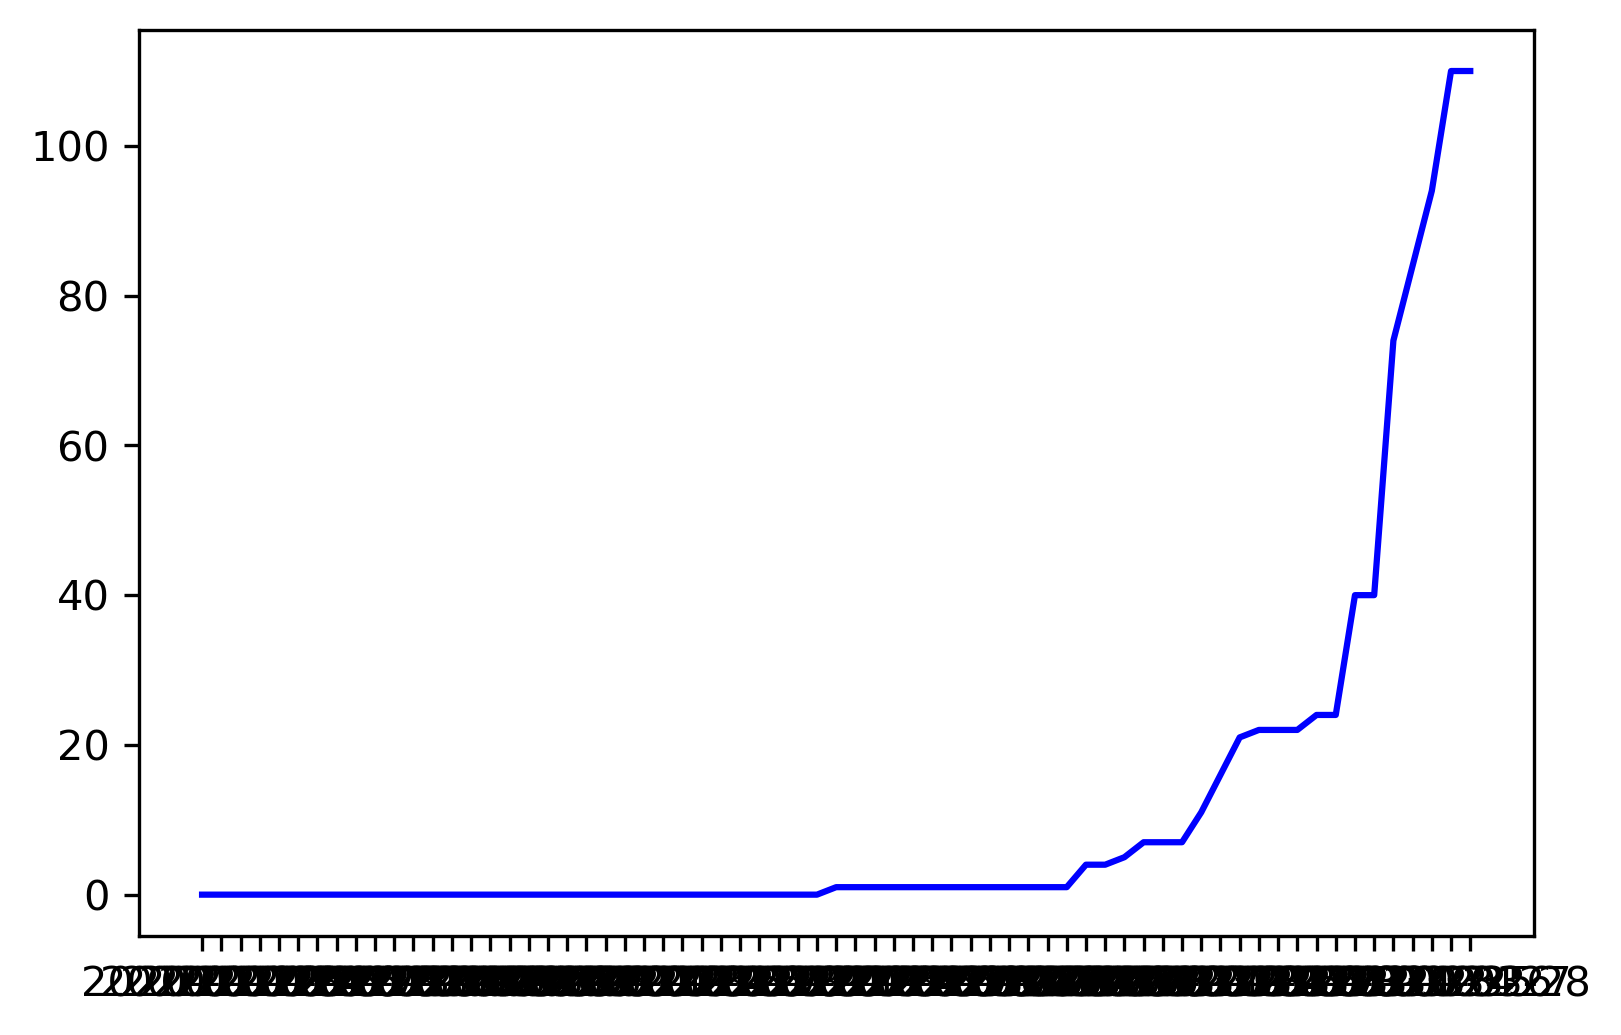

In [108]:
df_p = df_r.loc['Afghanistan']

# fig, ax = plt.subplots(1,1, figsize = (4,2), dpi=300)
fig, ax = plt.subplots(1,1, dpi=300)
fontl=8

ax.plot( df_p['Date'], df_p['ConfirmedCases'],'-',color='b', label='Max T')
